**1) Información de los datos:**

In [1]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [4]:
# importacion de las librerias necesiarias:

import imblearn
import pickle
import folium
import os
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import imblearn
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from plotly.subplots import make_subplots

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn.preprocessing import StandardScaler


In [125]:
# cargar de los datos:
df = pd.read_csv("Completo 20230121.csv", encoding='latin-1')
df.head(3)


,msdynci_customerid,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad,Casos abiertos en ult 12 meses,Casos abiertos,Cant com en ult 24 meses,Scores 2.Encuestas,Ren aut de contrato,Facturacion,Casos Creados_completo.Catidad de Incidentes,Casos Creados_completo.Cantidad de Reclamos,Casos Creados_completo.Tiempo de respuesta promedio,Casos Creados_completo.Fraccion a tiempo,Churn
0,0d14eaf6e21c1292026c7b40ceae396e,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,0
1,2fb88bef68c15bdabd29702c7f7dbf5f,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70,0
2,000ef4f31d53a8315a51f7f5c2d1b6a2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50,0


In [126]:
columna = df['msdynci_customerid']
print(columna)


0        0d14eaf6e21c1292026c7b40ceae396e
1        2fb88bef68c15bdabd29702c7f7dbf5f
2        000ef4f31d53a8315a51f7f5c2d1b6a2
3        c26a37091399b830ec01f7fe3f5fa484
4        00109cbd2395b622807dc4835badcd96
                       ...               
24946    ee53ae1c80e1fbcad0c2266a32e1b2a8
24947    f029a18cb2e36d63fe5ee5d3098bdf6f
24948    f1602f28ade800e3162764c31ceaf50c
24949    f5a12bf7b7d3b5edc8b03f67e4fabbb6
24950    f70f49b77953604e771b8f2e5f913efb
Name: msdynci_customerid, Length: 24951, dtype: object


In [6]:
# informacion sobre la dimension de la data:
df.shape


(24951, 17)

In [7]:
# Inspección de la informacion del dataset:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   msdynci_customerid                                   24951 non-null  object 
 1   País de Venta                                        24951 non-null  object 
 2   Vertical                                             24951 non-null  object 
 3   Meses desde última Factura                           24951 non-null  int64  
 4   Cant de equipos arrendados                           24951 non-null  int64  
 5   Antiguedad                                           24951 non-null  float64
 6   Casos abiertos en ult 12 meses                       24951 non-null  int64  
 7   Casos abiertos                                       24951 non-null  int64  
 8   Cant com en ult 24 meses                             24951 non-nul

In [8]:
# Se extrae la columna clientes:
df = df.drop(['msdynci_customerid'], axis=1)
df.head()


,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad,Casos abiertos en ult 12 meses,Casos abiertos,Cant com en ult 24 meses,Scores 2.Encuestas,Ren aut de contrato,Facturacion,Casos Creados_completo.Catidad de Incidentes,Casos Creados_completo.Cantidad de Reclamos,Casos Creados_completo.Tiempo de respuesta promedio,Casos Creados_completo.Fraccion a tiempo,Churn
0,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,0
1,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70,0
2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50,0
3,Perú,TRANSPORTES - TRN/LOGISTICAS,22,0,1.69,0,0,21,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,1
4,Costa Rica,GUBERNAMENTAL - GSV,1,3,1.55,0,0,1,Indiferente,1.00,Facturación muy alta,3,4,54.86,0.29,0


In [9]:
# Observacion del dataset por su estructura en columnas:
df.columns


Index(['País de Venta', 'Vertical', 'Meses desde última Factura',
       'Cant de equipos arrendados', 'Antiguedad',
       'Casos abiertos en ult 12 meses', 'Casos abiertos',
       'Cant com en ult 24 meses', 'Scores 2.Encuestas', 'Ren aut de contrato',
       'Facturacion', 'Casos Creados_completo.Catidad de Incidentes',
       'Casos Creados_completo.Cantidad de Reclamos',
       'Casos Creados_completo.Tiempo de respuesta promedio',
       'Casos Creados_completo.Fraccion a tiempo', 'Churn'],
      dtype='object')

In [10]:
# Se procede a renombrar algunas columnas:
df1 = df.rename(columns={"msdynci_customerid": "customer_id", 'Facturacion': "Categoría_de_facturación", 'Cant com en ult 24 meses': "Cant_de_comunic_últimos_24_meses", 'Antiguedad': "Antiguedad_de_Clientes", 'Scores 2.Encuestas': "Encuestas", 'Casos Creados_completo.Catidad de Incidentes': "Cantidad_de_Incidentes",
                'Casos Creados_completo.Cantidad de Reclamos': "Cantidad_de_Reclamos", 'Casos Creados_completo.Fraccion a tiempo': "Tiempo_de_respuesta", 'Casos Creados_completo.Tiempo de respuesta promedio': "Tiempo promedio de respuesta", 'Ren aut de contrato': 'Ren_aut_de_contrato'})


In [11]:
df1.head(3)


,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Churn
0,Puerto Rico,SERVICIOS - SRV,5,1,1.57,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,0
1,Brasil,COMERCIO - CMR,1,1,1.54,4,0,4,Indiferente,0.00,Facturación muy baja,38,15,53.26,0.70,0
2,Chile,COMERCIO - CMR,0,2,1.69,0,0,14,Indiferente,0.00,Facturación alta,22,0,58.32,0.50,0


In [12]:
# Observacion de las nuevas columnas
df1.columns


Index(['País de Venta', 'Vertical', 'Meses desde última Factura',
       'Cant de equipos arrendados', 'Antiguedad_de_Clientes',
       'Casos abiertos en ult 12 meses', 'Casos abiertos',
       'Cant_de_comunic_últimos_24_meses', 'Encuestas', 'Ren_aut_de_contrato',
       'Categoría_de_facturación', 'Cantidad_de_Incidentes',
       'Cantidad_de_Reclamos', 'Tiempo promedio de respuesta',
       'Tiempo_de_respuesta', 'Churn'],
      dtype='object')

In [13]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   País de Venta                     24951 non-null  object 
 1   Vertical                          24951 non-null  object 
 2   Meses desde última Factura        24951 non-null  int64  
 3   Cant de equipos arrendados        24951 non-null  int64  
 4   Antiguedad_de_Clientes            24951 non-null  float64
 5   Casos abiertos en ult 12 meses    24951 non-null  int64  
 6   Casos abiertos                    24951 non-null  int64  
 7   Cant_de_comunic_últimos_24_meses  24951 non-null  int64  
 8   Encuestas                         24951 non-null  object 
 9   Ren_aut_de_contrato               24951 non-null  float64
 10  Categoría_de_facturación          24951 non-null  object 
 11  Cantidad_de_Incidentes            24951 non-null  int64  
 12  Cant

In [14]:
# variables:
# 1) País de Venta: variable categórica que representa la subsidiaria de Ricoh que generó el registro en el CRM.
# 2) Vertical: variable categórica que indica el tipo de empresa, como ser: servicios públicos, instituciones educativas, servicios profesionales, entre otros.
# 3) Meses desde ultima factura: variable numérica que indica la cantidad de meses que han transcurridos desde que se emitió la última factura al cliente.
# 4) Cantidad de equipos arrendados: variable numérica que indica la cantidad de los equipos por un mismo cliente.
# 5) Antigüedad del cliente: Variable numérica que indica la cantidad de años que el cliente trabaja con la empresa.
# 6) Casos abiertos en los últimos 12 meses: Variable numérica que indica la cantidad de casos de quejas que fueron abiertos en los últimos doce meses.
# 7) Casos abiertos :Variable numérica que indica la cantidad de casos de quejas que están abiertas en este momento.
# 8) Cantidad de comunicaciones en los últimos 24 meses: variable numérica que indica los contactos que se realizaron con el cliente por distintos medios de comunicación, como ser: llamada, mail, cita, entre otros.
# 9) Encuestas: variable categórica para orientar la satisfacción del cliente. Siendo estas “Negativas”, “Indiferentes” y “Positivas”.
# 10) Renovación automática de contrato: variable numérica que indica la fracción de contratos en lo que se canceló la auto renovación, en los últimos 24 meses.
# 11) Categoría de facturación: variable categórica que representa los montos facturados en categorías de “Facturación muy baja”, “Facturación baja”, “Facturación alta”, “Facturación muy alta”, en base a la distribución de los datos.
# 12) Cantidad de incidentes: variable numérica que indica la cantidad de veces en los últimos 24 meses en los que técnicos de Ricoh detectaron anomalías.
# 13) Cantidad de reclamos: variable numérica que indica la cantidad de veces en los últimos 24 meses en los que el cliente solicitó acción correctiva por parte de Ricoh.
# 14) Tiempo promedio de respuesta: variable numérica que indica el promedio de tiempo en solucionar los requerimientos de los clientes.
# 15) Tiempo de respuesta: variable numérica que indica el tiempo en que personal de Ricoh abordó y solucionó el reclamo.
# 16) Churn: variable categórica que indica si el cliente permanece en la empresa o no.


In [15]:
# se selecionan 10 elementos del dataset sin repetición
df1.sample(10, random_state=1234)


,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Churn
8694,Chile,OTHER,17,0,1.39,0,0,0,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,1
450,Argentina,SERVICIOS PROFESIONALES,20,0,1.59,0,0,1,Indiferente,0.00,Facturación muy baja,0,0,0.00,0.00,1
11167,Guatemala,EDUCACION - EDU,0,1,1.54,0,0,1,Indiferente,0.00,Facturación muy baja,2,0,81.00,0.00,0
18115,Panamá,RELIGIOSOS - REL,0,5,1.61,12,6,2,Indiferente,0.00,Facturación muy alta,3,10,36.77,0.62,0
19923,México,GUBERNAMENTAL - GSV,1,434,1.63,4,1,39,Indiferente,0.90,Facturación muy alta,0,0,0.00,0.00,0
17120,Dominicana,OTHER,1,2,0.98,0,0,1,Positiva,0.00,Facturación baja,1,2,46.00,0.33,0
6050,Chile,MANUFACTURA - MNF,1,12,1.69,0,0,2,Indiferente,0.00,Facturación muy alta,29,12,60.73,0.59,0
1770,Puerto Rico,COOPERATIVAS-COOP,0,4,11.96,0,0,0,Indiferente,0.00,Facturación alta,0,0,0.00,0.00,0
24924,Puerto Rico,COMERCIO - CMR,2,2,1.57,0,0,5,Indiferente,0.00,Facturación baja,0,0,0.00,0.00,0
24364,Costa Rica,COMERCIO - CMR,1,2,1.55,0,0,2,Indiferente,0.00,Facturación muy baja,5,3,63.38,0.62,0


In [16]:
# para desrbiribir no solo variables númericas sino también otro tipo de variables
df1.describe(include=['object', 'category', 'datetime64'])


,País de Venta,Vertical,Encuestas,Categoría_de_facturación
count,24951,24951,24951,24951
unique,12,30,3,5
top,Brasil,COMERCIO - CMR,Indiferente,Facturación baja
freq,3850,5889,23282,5638


In [17]:
# resumen de variables numericas
df1.describe().T


,count,mean,std,min,25%,50%,75%,max
Meses desde última Factura,24951.00,5.68,7.73,0.00,1.00,1.00,9.00,28.00
Cant de equipos arrendados,24951.00,6.87,41.82,0.00,0.00,1.00,3.00,2255.00
Antiguedad_de_Clientes,24951.00,1.59,0.79,0.00,1.54,1.57,1.63,14.88
Casos abiertos en ult 12 meses,24951.00,2.11,4.33,0.00,0.00,0.00,0.00,16.00
Casos abiertos,24951.00,0.31,1.32,0.00,0.00,0.00,0.00,16.00
Cant_de_comunic_últimos_24_meses,24951.00,4.88,17.72,0.00,0.00,0.00,3.00,774.00
Ren_aut_de_contrato,24951.00,0.07,0.24,0.00,0.00,0.00,0.00,1.00
Cantidad_de_Incidentes,24951.00,14.00,109.95,0.00,0.00,0.00,6.00,7715.00
Cantidad_de_Reclamos,24951.00,7.24,63.21,0.00,0.00,0.00,2.00,4018.00
Tiempo promedio de respuesta,24951.00,30.14,28.23,0.00,0.00,39.00,53.72,100.00


<AxesSubplot:>

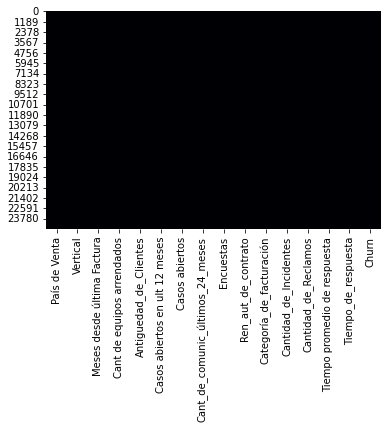

In [18]:
# inspeccion de valores nulos en el conjunto de datos
sns.heatmap(df1.isnull(), cmap='magma', cbar=False)

# Con el grafico se observa como resultado, que no hay valores nulos.


In [19]:
# Para observar valores nulos es posible ejecutar tambien el comando isnull:
df1.isnull()


,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24949,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# observacion de los registros nulos por columnas:
df1.isnull().sum()


País de Venta                       0
Vertical                            0
Meses desde última Factura          0
Cant de equipos arrendados          0
Antiguedad_de_Clientes              0
Casos abiertos en ult 12 meses      0
Casos abiertos                      0
Cant_de_comunic_últimos_24_meses    0
Encuestas                           0
Ren_aut_de_contrato                 0
Categoría_de_facturación            0
Cantidad_de_Incidentes              0
Cantidad_de_Reclamos                0
Tiempo promedio de respuesta        0
Tiempo_de_respuesta                 0
Churn                               0
dtype: int64

In [21]:
# observacion de los registros nulos por filas:
df1.isnull().sum(axis=1)


0        0
1        0
2        0
3        0
4        0
        ..
24946    0
24947    0
24948    0
24949    0
24950    0
Length: 24951, dtype: int64

In [22]:
# valor total de valores nulos:
df1.isnull().sum().sum()


0

In [23]:

# Utilización del método sum() para contar el número de verdaderos.
df1.isnull().any(axis=1).sum()


0

In [24]:
# Inspeccion del tipos de empresas que se encuentran en el dataset:

df1['Vertical'].unique()


array(['SERVICIOS - SRV', 'COMERCIO - CMR',
       'TRANSPORTES - TRN/LOGISTICAS', 'GUBERNAMENTAL - GSV',
       'RETAIL - RTL', 'ENERGIA - ENRG', 'MINERIA - MIN',
       'MANUFACTURA - MNF', 'OTHER', 'EDUCACION - EDU',
       'HOSPITALES/SALUD - HSP', 'GRAPHIC COMMUNICATIONS-GC',
       'CONSTRUCCION - CNSTR', 'AGRICULTURA-AGRO', 'LEGALES - LGL',
       'PETROLEO - PTR', 'BANCA - BNK', 'FARMACEUTICAS - PHA',
       'HOTELES/TURISMO - HTL', 'SIN FINES DE LUCRO - NPS',
       'ASEGURADORAS - INS', 'SERVICIOS PROFESIONALES',
       'COMUNICACIONES - CMT', 'AGENCIAS DE PUBLICIDAD - PUB',
       'OFICINAS PROFESIONALES - OFPRO', 'COOPERATIVAS-COOP',
       'RELIGIOSOS - REL', 'BIENES RAICES-REALESTATE',
       'INTERCOMPANIES - INT', 'INDIVIDUAL PROFESSIONAL'], dtype=object)

In [25]:
# Se observan los casos abiertos en el dataset:
df1['Casos abiertos'].unique()


array([ 0,  1,  2,  3, 15,  4, 13,  7, 12,  6, 11, 10,  5,  9, 14, 16,  8],
      dtype=int64)

In [26]:
# Grupo de clientes
df1['Encuestas'].unique()


array(['Indiferente', 'Negativa', 'Positiva'], dtype=object)

In [27]:
# Tal como se mensiona en el documento entregable de la tesis, se seleccionaron algunas variables para realizar ciertos analisis y modelos:
#df2= df1[["customer_id", "Cantidad_de_Incidentes","Cantidad_de_Reclamos","Tiempo_de_respuesta","Antiguedad_de_Clientes","Meses desde última Factura","Ren_aut_de_contrato","Cant_de_comunic_últimos_24_meses","Cant de equipos arrendados","Encuestas","Churn" ]]
# df2.head(3)
# De resiltados obtenidos, se considera adecuado utilizar todas las variables.


In [28]:
le = LabelEncoder()

df2 = df1.copy(deep=True)
text_data_features = [i for i in list(
    df1.columns) if i not in list(df1.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features:
    df2[i] = le.fit_transform(df2[i])
    print(i, ' : ', df2[i].unique(), ' = ',
          le.inverse_transform(df2[i].unique()))


# Se crea una copia profunda del conjunto de datos original y se etiqueta la codificacion de los datos de texto.


Label Encoder Transformation
País de Venta  :  [11  1  2 10  4  7  3  9  6  8  5  0]  =  ['Puerto Rico' 'Brasil' 'Chile' 'Perú' 'Costa Rica' 'Guatemala' 'Colombia'
 'Panamá' 'El Salvador' 'México' 'Dominicana' 'Argentina']
Vertical  :  [26  5 29 13 25 10 20 19 22  9 14 12  7  1 18 23  3 11 15 28  2 27  6  0
 21  8 24  4 17 16]  =  ['SERVICIOS - SRV' 'COMERCIO - CMR' 'TRANSPORTES - TRN/LOGISTICAS'
 'GUBERNAMENTAL - GSV' 'RETAIL - RTL' 'ENERGIA - ENRG' 'MINERIA - MIN'
 'MANUFACTURA - MNF' 'OTHER' 'EDUCACION - EDU' 'HOSPITALES/SALUD - HSP'
 'GRAPHIC COMMUNICATIONS-GC' 'CONSTRUCCION - CNSTR' 'AGRICULTURA-AGRO'
 'LEGALES - LGL' 'PETROLEO - PTR' 'BANCA - BNK' 'FARMACEUTICAS - PHA'
 'HOTELES/TURISMO - HTL' 'SIN FINES DE LUCRO - NPS' 'ASEGURADORAS - INS'
 'SERVICIOS PROFESIONALES' 'COMUNICACIONES - CMT'
 'AGENCIAS DE PUBLICIDAD - PUB' 'OFICINAS PROFESIONALES - OFPRO'
 'COOPERATIVAS-COOP' 'RELIGIOSOS - REL' 'BIENES RAICES-REALESTATE'
 'INTERCOMPANIES - INT' 'INDIVIDUAL PROFESSIONAL']
Encuestas 

In [29]:
# Se inspecciona la informacion de los datos de "df2":
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   País de Venta                     24951 non-null  int32  
 1   Vertical                          24951 non-null  int32  
 2   Meses desde última Factura        24951 non-null  int64  
 3   Cant de equipos arrendados        24951 non-null  int64  
 4   Antiguedad_de_Clientes            24951 non-null  float64
 5   Casos abiertos en ult 12 meses    24951 non-null  int64  
 6   Casos abiertos                    24951 non-null  int64  
 7   Cant_de_comunic_últimos_24_meses  24951 non-null  int64  
 8   Encuestas                         24951 non-null  int32  
 9   Ren_aut_de_contrato               24951 non-null  float64
 10  Categoría_de_facturación          24951 non-null  int32  
 11  Cantidad_de_Incidentes            24951 non-null  int64  
 12  Cant

In [30]:
# describe el df2
df2.describe()


,País de Venta,Vertical,Meses desde última Factura,Cant de equipos arrendados,Antiguedad_de_Clientes,Casos abiertos en ult 12 meses,Casos abiertos,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Churn
count,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00,24951.00
mean,5.41,16.06,5.68,6.87,1.59,2.11,0.31,4.88,0.10,0.07,1.75,14.00,7.24,30.14,0.29,0.21
std,3.55,8.65,7.73,41.82,0.79,4.33,1.32,17.72,0.39,0.24,1.30,109.95,63.21,28.23,0.32,0.41
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,5.00,1.00,0.00,1.54,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,5.00,19.00,1.00,1.00,1.57,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,39.00,0.23,0.00
75%,9.00,22.00,9.00,3.00,1.63,0.00,0.00,3.00,0.00,0.00,3.00,6.00,2.00,53.72,0.50,0.00
max,11.00,29.00,28.00,2255.00,14.88,16.00,16.00,774.00,2.00,1.00,4.00,7715.00,4018.00,100.00,1.00,1.00


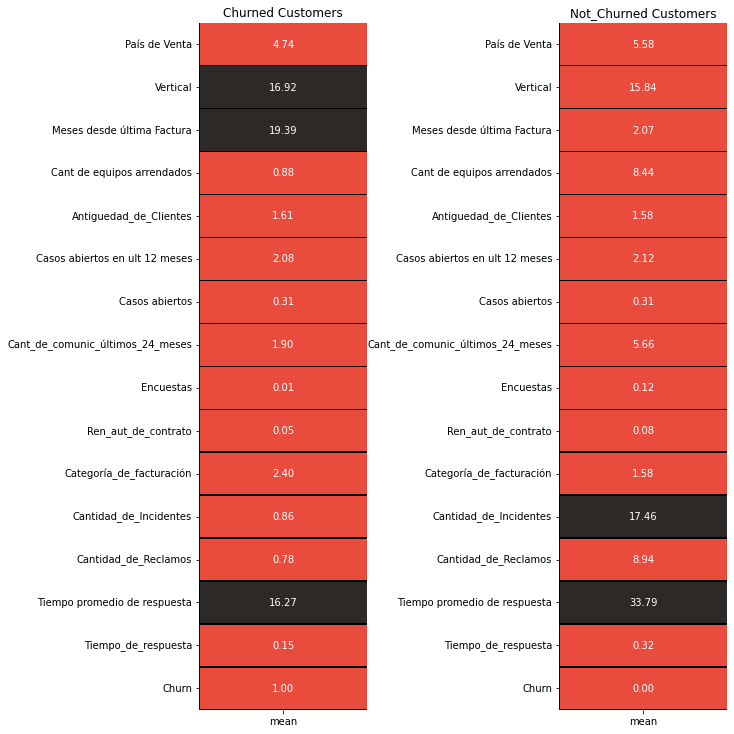

In [31]:
colors = ['#E94B3C', '#2D2926']

churn = df2[df2['Churn'] == 1].describe().T
not_churn = df2[df2['Churn'] == 0].describe().T

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.heatmap(churn[['mean']], annot=True, cmap=colors,
            linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Churned Customers')

plt.subplot(1, 2, 2)
sns.heatmap(not_churn[['mean']], annot=True, cmap=colors,
            linewidths=0.4, linecolor='black', cbar=False, fmt='.2f',)
plt.title('Not_Churned Customers')

fig.tight_layout(pad=0)

# Se grafican valores medios de todas las columnas de la variable objetivo.


##### Se exponen valores medios de todas las variables, con relación a la variable objetivo.
##### Se puede observar que el tiempo promedio de respuesta de los que abandonan son mas bajos con respecto a los que se quedan.
##### Sitauacion similar se observa con el promedio de incidentes, ya que este es mucho mayor en los que se quedan, que en los que se van, esto también tiene una incidencia de tiempo, quienes se quedan tienen mas posibilidad de registrar incidentes con respecto a un cliente que ya se fue.


**2) Exploratory Data Analysis:**

In [32]:
# Se procede a dividir las columnas en numericas y categoricas:
col = list(df2.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df2[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :', *categorical_features)
print('Numerical Features :', *numerical_features)


Categorical Features : Encuestas Categoría_de_facturación Churn
Numerical Features : País de Venta Vertical Meses desde última Factura Cant de equipos arrendados Antiguedad_de_Clientes Casos abiertos en ult 12 meses Casos abiertos Cant_de_comunic_últimos_24_meses Ren_aut_de_contrato Cantidad_de_Incidentes Cantidad_de_Reclamos Tiempo promedio de respuesta Tiempo_de_respuesta


###### *Aquí, las variables categóricas se definen si el atributo tiene menos de 6 elementos únicos; de lo contrario, es una variable numérica.*

###### *El enfoque típico para esta división de variables también puede basarse en los tipos de datos de los elementos del atributo respectivo.*

###### *Ejemplo : tipo de datos = integer, atributo = variable numerica ; tipo de dato = string, attribute = categorical feature*

##### *Para este conjunto de datos, como la cantidad de características es menor, también se puede verificar manualmente el conjunto de datos.* 

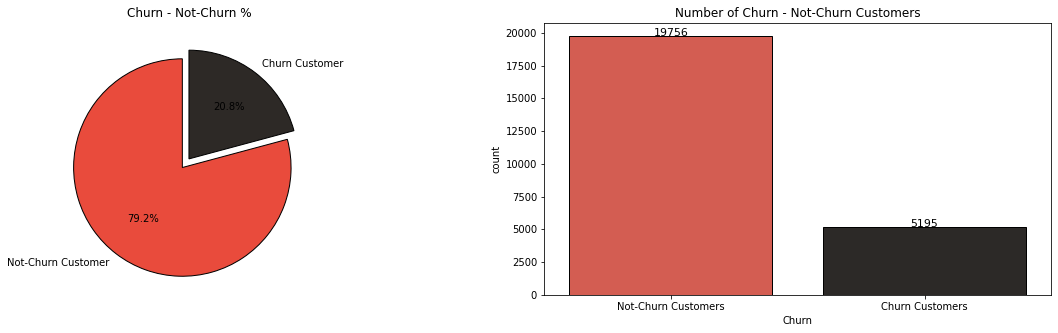

In [33]:
# Target Variable Visualization (Churn) :
l = list(df2['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Churn - Not-Churn %')

plt.subplot(1, 2, 2)
ax = sns.countplot('Churn', data=df2, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2,
            rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

plt.title('Number of Churn - Not-Churn Customers')
plt.show()


In [34]:
# De lo expuesto se logra ver que el dataset esta desbalanceado proximo a una relacion 4:1 ratio de no Churn: churn
# Debido a esto, sin una tecnica de balanceo de datos, las predicciones estarán sesgadas hacia los clientes que no abandonan.


In [35]:
color_discrete_sequence = ['#7b8b6f',
                           '#a29988', '#c7b8a1', '#90A5A7', '#a27e7e']


In [36]:

def plot_sunburst(col):
    fig = px.sunburst(df2, path=[col, 'Churn'], values='count',
                      names=col, color_discrete_sequence=color_discrete_sequence)
    fig.update_layout(height=600, width=600,
                      title_text=f'<b style="color:#7b8b6f;">Percent of Churn by {col}</b>')
    fig.update_traces(textinfo="label+percent parent", textfont_size=16)
    return fig.show()


In [37]:
fig = go.Figure(
    go.Pie(labels=['0', '1'], values=df2.Churn.value_counts(), name='Churn'))
fig.update_traces(hole=.4, hoverinfo="label+percent",
                  textfont_size=16, marker={'colors': color_discrete_sequence})
fig.update_layout(height=500, width=500,
                  title_text='<b style="color:#7b8b6f;">Percent of Churn</b>')
fig.show()
#se expone otro tipo de graficos utilizado para observar la distribucion del churn en el conjunto de datos

***Outliers***


In [38]:
# Se realiza un analisis de los outliers, dado que estos son importante ya que pueden afectar los resultados que se obtienen con los modelos de matchine Learning ("ML"), aunque depende de cada caso que acciones tomar sobre ellos.
# Los Outliers pueden significar varias cosas:

# ERROR: Si se tiene un grupo de “edades de personas” y se observa una persona con 160 años, seguramente sea un error de carga de datos. En este caso, la detección de outliers ayuda a detectar errores en el conjunto de datos.
# LIMITES: En otros casos, se pueden tener valores que se escapan del “grupo medio”, pero se desea mantener el dato modificado, para que no perjudique al aprendizaje del modelo de ML.
# Punto de Interés: puede que sean los casos “anómalos” los que se quieren detectar y que sea el objetivo (y no un enemigo)


In [39]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Box(y=df2['Cant de equipos arrendados'], name='Equipos Arrendados', marker={
              'color': color_discrete_sequence[0]}), row=1, col=1)
fig.add_trace(go.Box(y=df2['Cantidad_de_Incidentes'], name='Incidentes', marker={
              'color': color_discrete_sequence[1]}), row=1, col=2)
fig.add_trace(go.Box(y=df2['Cantidad_de_Reclamos'], name='Reclamos', marker={
              'color': color_discrete_sequence[2]}), row=1, col=3)
fig.update_layout(height=600, width=800,
                  title_text="<b style='color:#7b8b6f'>Box chart for equipos arrendados, Incidentes y Reclamos</b>")
fig.show()


In [40]:
# Del análisis de los Outliers del conjunto de datos, y el problema objetivo, se considera que estos outliers no requieren un tratamiento de modificacion o
# eliminacion del conjunto de datos, ya que no distorsionan la realidad, sino que son parte de los datos que interesan ser captados con los modelos de ML.

In [41]:
# Se elimina la columna objetivo solo por temas de visulaización
categorical_features.remove('Churn')


In [42]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   País de Venta                     24951 non-null  int32  
 1   Vertical                          24951 non-null  int32  
 2   Meses desde última Factura        24951 non-null  int64  
 3   Cant de equipos arrendados        24951 non-null  int64  
 4   Antiguedad_de_Clientes            24951 non-null  float64
 5   Casos abiertos en ult 12 meses    24951 non-null  int64  
 6   Casos abiertos                    24951 non-null  int64  
 7   Cant_de_comunic_últimos_24_meses  24951 non-null  int64  
 8   Encuestas                         24951 non-null  int32  
 9   Ren_aut_de_contrato               24951 non-null  float64
 10  Categoría_de_facturación          24951 non-null  int32  
 11  Cantidad_de_Incidentes            24951 non-null  int64  
 12  Cant

 **3)Feature Engineering**

<AxesSubplot:>

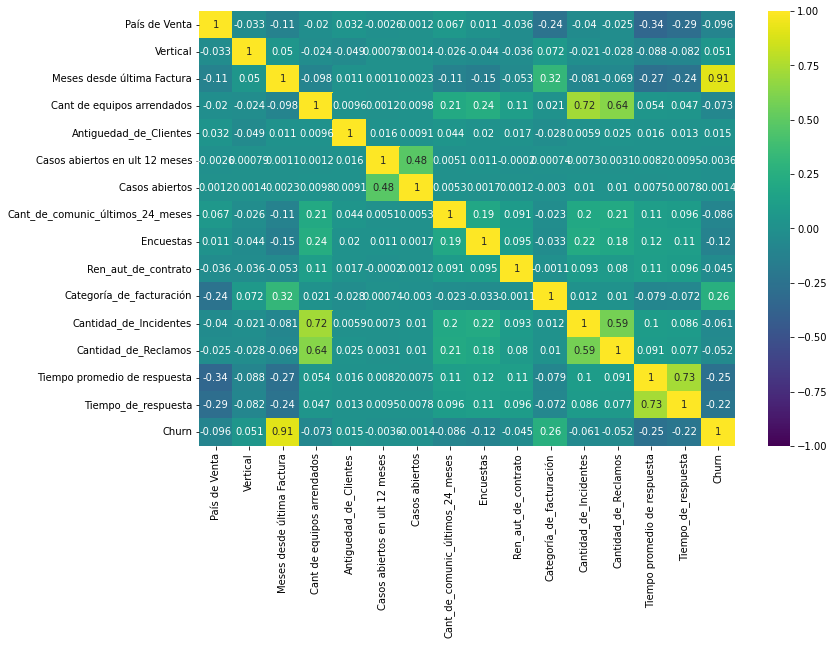

In [43]:
# Plotting a heatmap to find relations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='viridis', vmax=1, vmin=-1, center=0)


Text(0.5, 1.0, 'Correlation w.r.t Outcome')

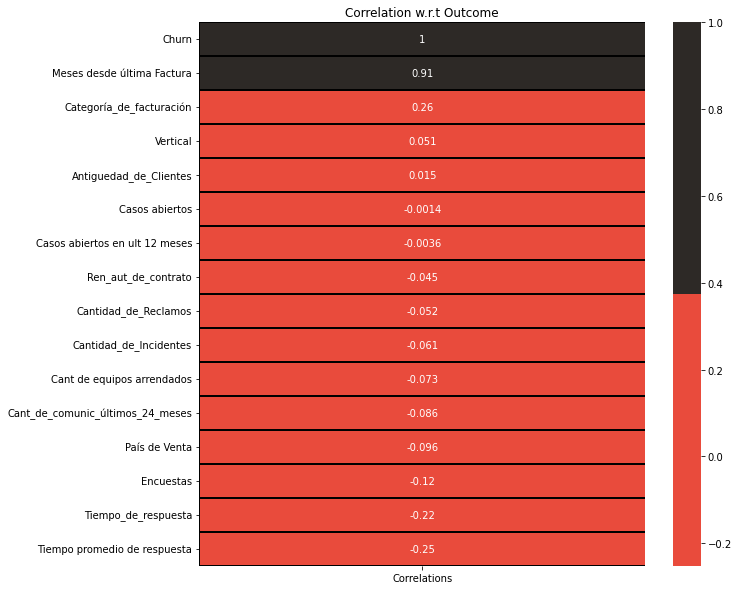

In [44]:
corr = df2.corrwith(df2['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Outcome')


In [45]:
# Se eliminan las variables con coeficiente de correlación entre (-0.1,0.1), por presentar poca correlacion.
# Se quitan las variables antiguedad de clientes,casos abiertos,casos abiertos en los utl 12 meses, ren_aut_de contrato,cantidad de reclamos,
# cantidad_de_incidentes, cant de equipos arrendados, cant_de_comunic_últimos_24_meses.
# Las demas variables tienen una correlación significativa, ya sea positiva o negativa.


Text(0.5, 1.0, 'Selection of Categorical Features')

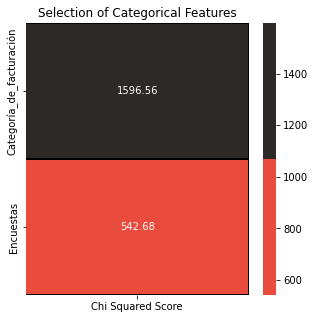

In [46]:
# Chi-Squared Test:

features = df2.loc[:, categorical_features]
target = df2.loc[:, 'Churn']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(
    features.columns), columns=['Chi Squared Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')


**ANOVA Test :**

Text(0.5, 1.0, 'Selection of Numerical Features')

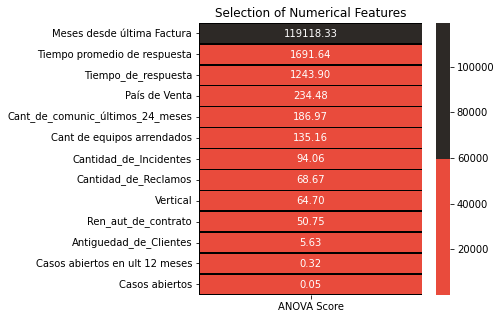

In [47]:
features = df2.loc[:, numerical_features]
target = df2.loc[:, 'Churn']

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(
    features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')


In [48]:
# Según la prueba de ANOVA, cuanto mayor sea el valor de la puntuación de ANOVA, mayor será la importancia de la variable.
# A partir de los resultados anteriores, resulta que se deben incluir todas las características numéricas para el modelado.
# Dado los resultados, se eliminan las variables: Antiguedad_de_Clientes, Casos abiertos en ult 12 meses , Casos abiertos.


In [49]:
df2.drop(columns=['Meses desde última Factura', 'Casos abiertos',
         'Casos abiertos en ult 12 meses', 'Antiguedad_de_Clientes'], inplace=True)
df2.head()


,País de Venta,Vertical,Cant de equipos arrendados,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,Churn
0,11,26,1,0,0,0.00,3,0,0,0.00,0.00,0
1,1,5,1,4,0,0.00,3,38,15,53.26,0.70,0
2,2,5,2,14,0,0.00,0,22,0,58.32,0.50,0
3,10,29,0,21,0,0.00,3,0,0,0.00,0.00,1
4,4,13,3,1,0,1.00,2,3,4,54.86,0.29,0


***Data Balancing using SMOTE :***

In [50]:
# Para hacer frente a los datos desequilibrados, hay 2 opciones:
# Submuestreo: recorta las muestras mayoritarias de la variable de destino.
# Sobremuestreo: aumente las muestras minoritarias de la variable de destino a las muestras mayoritarias.

# Después de hacer prueba-error con submuestreo y sobremuestreo, ¡se decidido optar por el sobremuestreo!
# Para el balance de datos, se utiliza imblearn.
# Declaración de pip: instalación de pip desequilibrada-aprendizaje


In [51]:
over = SMOTE(sampling_strategy=1)

x = df2.iloc[:, :11].values
y = df2.iloc[:, 11].values

x, y = over.fit_resample(x, y)
Counter(y)


Counter({0: 19756, 1: 19756})

In [52]:
# transformar x e y en dataframe
x = pd.DataFrame(x)
y = pd.DataFrame(y)


In [53]:
# observar los datos de x :
x.head()


,0,1,2,3,4,5,6,7,8,9,10
0,11.00,26.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00
1,1.00,5.00,1.00,4.00,0.00,0.00,3.00,38.00,15.00,53.26,0.70
2,2.00,5.00,2.00,14.00,0.00,0.00,0.00,22.00,0.00,58.32,0.50
3,10.00,29.00,0.00,21.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00
4,4.00,13.00,3.00,1.00,0.00,1.00,2.00,3.00,4.00,54.86,0.29


In [54]:
# observar los datos de y
y.sample(5)


,0
13698,0
19706,0
33341,1
11093,0
27273,1


***4) Modelo***:

In [55]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.2, stratify=y)

# Se separa el dataset en 80% train y 20% test


In [56]:
def model(classifier, x_train, y_train, x_test, y_test):

    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(
        classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(
        roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def model_evaluation(classifier, x_test, y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value)
                   for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2,
              v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))


***1)Decision Tree Classifier:***


Primer Arbol:

In [57]:
# primer Arbol de desición:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# Random_state = muestra la aleatoriedad del estimador.
# max_depth = lo que me muestra es la profundidad.
# min_samples_leaf: El número mínimo de muestras requeridas para estar en un nodo hoja.


In [58]:
# Train the model
classifier_dt = DecisionTreeClassifier(
    random_state=1000, max_depth=4, min_samples_leaf=1)
classifier_dt.fit(X_train, y_train)
classifier_dt.score(X_test, y_test)


0.8389219283816273

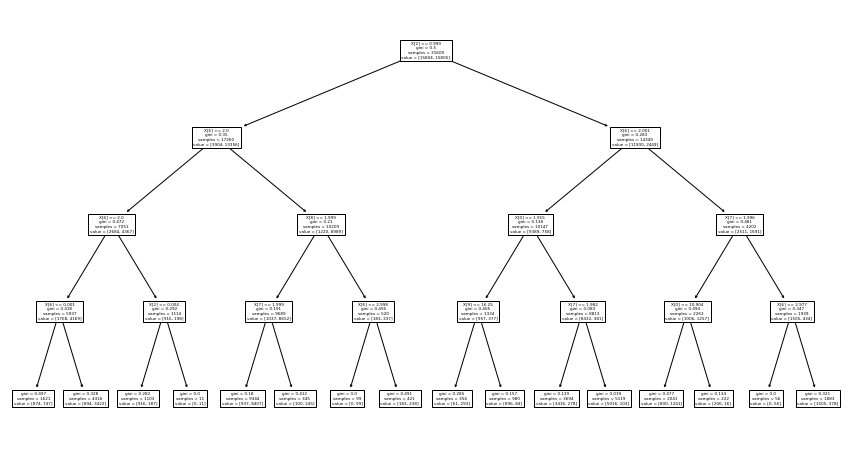

In [59]:
# Se expone un diseño grafico del arbol de desición:
from sklearn import tree
from matplotlib import pyplot as plt


plt.figure(figsize=(15, 8))
tree.plot_tree(classifier_dt)
plt.show()


Cross Validation Score :  90.57%
ROC_AUC Score :  83.89%


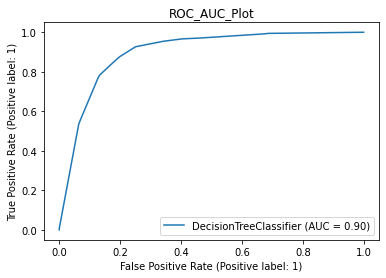

In [60]:
model(classifier_dt, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3952
           1       0.81      0.88      0.84      3951

    accuracy                           0.84      7903
   macro avg       0.84      0.84      0.84      7903
weighted avg       0.84      0.84      0.84      7903



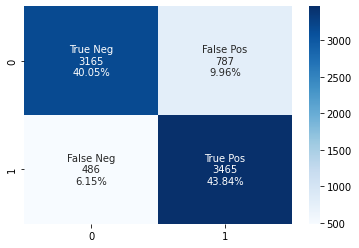

In [61]:
model_evaluation(classifier_dt, X_test, y_test)


Se procede a realizar una busqueda de mejora del resultado a traves de la optimizacion de los hiperparametros

In [62]:
# Busqueda de la profundidad
accuracies = list()
nro_feature = X_train.columns.size
depth_range = range(1, nro_feature+1)

# Testeo de la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                        min_samples_split=20,
                                        min_samples_leaf=5,
                                        max_depth=depth,
                                        random_state=0)
    tree_model.fit(X_train, y_train)
    accuracies.append(tree_model.score(X_test, y_test))

# Se exponen los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1              0.79
         2              0.79
         3              0.82
         4              0.84
         5              0.84
         6              0.85
         7              0.86
         8              0.86
         9              0.86
        10              0.87
        11              0.87


***Using GridSearchCV***

In [63]:
max_features = range(1, X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [2, 3, 4, 5]
parameters = dict(max_features=max_features,
                  criterion=criterion,
                  max_depth=max_depth,
                  min_samples_split=[20, 30],
                  min_samples_leaf=[5, 10])


In [64]:
classifier_GS = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters)
classifier_GS.fit(x, y)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': range(1, 12),
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [20, 30]})

In [65]:
print('Best Criterion:',
      classifier_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:',
      classifier_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:',
      classifier_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:',
      classifier_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:',
      classifier_GS.best_estimator_.get_params()['max_features'])
classifier_GS.best_estimator_.get_params()


Best Criterion: gini
Best max_depth: 5
Best min_samples_split: 20
Best min_samples_leaf: 5
Best Number Of Components: 6


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 6,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

Se expone el mejor arbol según los resultados de aplicar GridSearch:

In [66]:
classifier_dt_1 = DecisionTreeClassifier(random_state=1000, criterion='entropy', max_depth=5, min_samples_leaf=5, min_samples_split=20)
classifier_dt_1.fit(X_train, y_train)
classifier_dt_1.score(X_test, y_test)


0.8449955713020372

Cross Validation Score :  91.69%
ROC_AUC Score :  84.50%


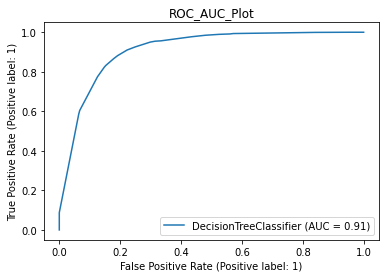

In [67]:
model(classifier_dt_1, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3952
           1       0.82      0.88      0.85      3951

    accuracy                           0.84      7903
   macro avg       0.85      0.85      0.84      7903
weighted avg       0.85      0.84      0.84      7903



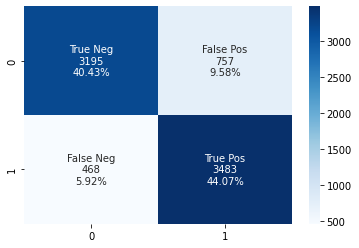

In [68]:
model_evaluation(classifier_dt_1, X_test, y_test)


In [69]:
y_pred_dt_1 = classifier_dt_1.predict(X_test)


Como se puede observar, si bien se obtiene una leve mejora, esta no es siginifcativa en realación a los trabajos realizados y los costos computacionales incurridos al tunerar los hiperparamentros.

***2) Random Forest Classifier:***

In [70]:
classifier_rf = RandomForestClassifier(random_state=1107)

# random_state = controla la aleatoriedad de arranque de las muestras utilizadas en la construcción del árbol.


Cross Validation Score :  95.82%
ROC_AUC Score :  89.33%


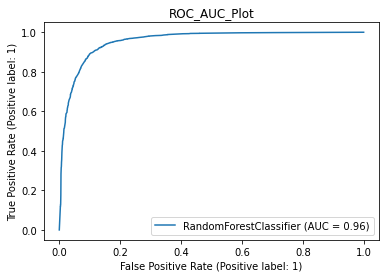

In [71]:
model(classifier_rf, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3952
           1       0.88      0.91      0.90      3951

    accuracy                           0.89      7903
   macro avg       0.89      0.89      0.89      7903
weighted avg       0.89      0.89      0.89      7903



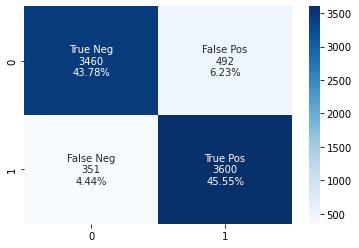

In [72]:
model_evaluation(classifier_rf, X_test, y_test)


In [73]:
y_pred = classifier_rf.predict(X_test)


In [74]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3952
           1       0.88      0.91      0.90      3951

    accuracy                           0.89      7903
   macro avg       0.89      0.89      0.89      7903
weighted avg       0.89      0.89      0.89      7903



Se realiza un análisis de investigacion de hiperparámetros, para seleccionar el mejor bosque.

In [75]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterio
criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               # 'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [76]:
classifier_grid = RandomForestClassifier(random_state=1107)
classifier_grid_random = RandomizedSearchCV(
    estimator=classifier_grid, n_iter=100, cv=5, random_state=1107, param_distributions=random_grid)


In [77]:
classifier_grid_random.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1107)

In [78]:
classifier_grid_random.best_params_


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 60,
 'criterion': 'entropy',
 'bootstrap': False}

In [79]:
best_param = classifier_grid_random.best_params_


In [80]:
best_param


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 60,
 'criterion': 'entropy',
 'bootstrap': False}

In [81]:
# Usando la mejor combinación de hiperparámetros, se estimo el modelo final
best_RF = RandomForestClassifier(**best_param)


In [82]:
best_RF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=60,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

Usando la mejor combinación de hiperparámetros, se estimo como modelo final:
best_RF=RandomForestClassifier(random_state=1107, n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_depth=100, criterion='entropy', bootstrap=True)
#best_RF.fit(X_train,y_train)

Cross Validation Score :  96.23%
ROC_AUC Score :  90.04%


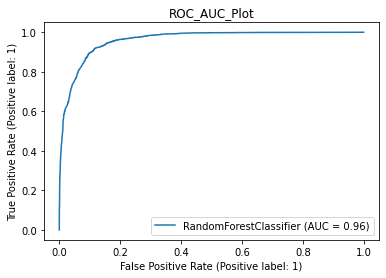

In [83]:
model(best_RF, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3952
           1       0.89      0.92      0.90      3951

    accuracy                           0.90      7903
   macro avg       0.90      0.90      0.90      7903
weighted avg       0.90      0.90      0.90      7903



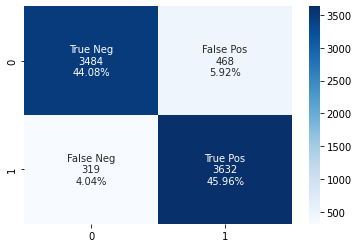

In [84]:
model_evaluation(best_RF, X_test, y_test)


In [85]:
y_pred_best = best_RF.predict(X_test)


In [86]:
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3952
           1       0.89      0.92      0.90      3951

    accuracy                           0.90      7903
   macro avg       0.90      0.90      0.90      7903
weighted avg       0.90      0.90      0.90      7903



***3) Xgboost Classifier:***

In [87]:
# Fit a Gradient Boosting model
# primer modelo que se aplica:
classifier_xgb = xgb.XGBClassifier(
    n_estimators=1000, learning_rate=0.01, max_depth=3, random_state=0)
#classifier_xgb.fit(X_train, y_train)
#y_pred = classifier_xgb.predict(X_test)
#accuracy_score(y_test, y_pred)


[02:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:44:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

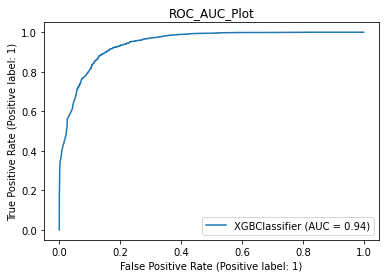

In [88]:
model(classifier_xgb, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.91      0.84      0.87      3952
           1       0.85      0.91      0.88      3951

    accuracy                           0.87      7903
   macro avg       0.88      0.87      0.87      7903
weighted avg       0.88      0.87      0.87      7903



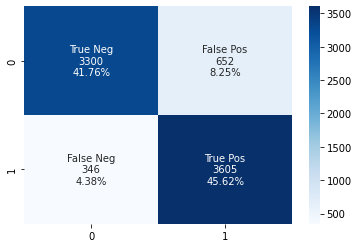

In [89]:
model_evaluation(classifier_xgb, X_test, y_test)


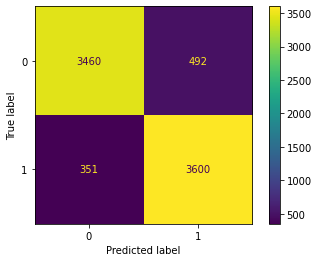

In [90]:
# otra manera de ver la matriz de confusion:
cm = confusion_matrix(y_test, y_pred, labels=classifier_xgb.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=classifier_xgb.classes_)
disp.plot()

plt.show()


XGBoost es un algoritmo de aprendizaje automático basado en un árbol de decisión que utiliza un marco de refuerzo de gradiente.
Una combinación perfecta de técnicas de optimización de software y hardware para obtener resultados superiores utilizando menos recursos informáticos en el menor tiempo posible.


In [91]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 3}

steps = 20  # The number of training iterations

model_1 = xgb.train(param, D_train, steps)


[02:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
predictions = model_1.predict(D_test)

In [93]:
classifier_xgb_1 = xgb.XGBClassifier()
parameters = {
    "eta": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

grid = GridSearchCV(classifier_xgb_1,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)


grid.fit(X_train, y_train)


[12:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, v

[12:17:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

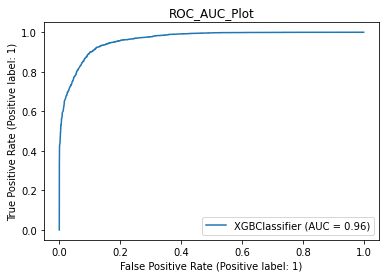

In [94]:
model(classifier_xgb_1, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.92      0.88      0.90      3952
           1       0.88      0.92      0.90      3951

    accuracy                           0.90      7903
   macro avg       0.90      0.90      0.90      7903
weighted avg       0.90      0.90      0.90      7903



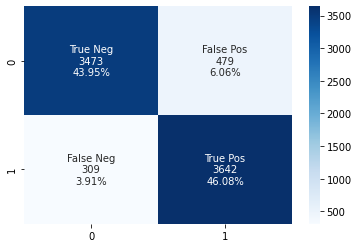

In [95]:
model_evaluation(classifier_xgb_1, X_test, y_test)


In [96]:
# score con regularizaciones

classifier_xgb_1.fit(X_train, y_train)
y_pred_1 = classifier_xgb_1.predict(X_test)
accuracy_score(y_test, y_pred_1)


[12:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9002910287232696

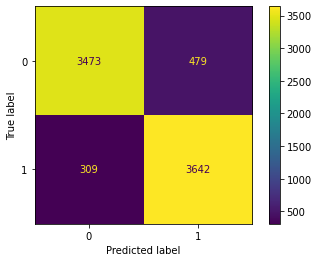

In [97]:
cm = confusion_matrix(y_test, y_pred_1, labels=classifier_xgb_1.classes_)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=classifier_xgb_1.classes_)
disp.plot()

plt.show()


***4) LightGBM Classifier :***

In [98]:
# LightGBM Classifier:
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  94.67%
ROC_AUC Score :  87.41%


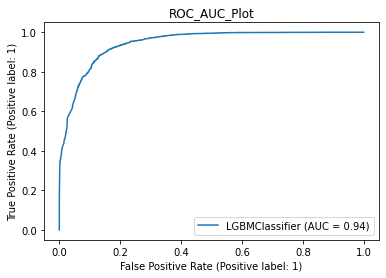

In [99]:
model(classifier_lgbm, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3952
           1       0.85      0.91      0.88      3951

    accuracy                           0.87      7903
   macro avg       0.88      0.87      0.87      7903
weighted avg       0.88      0.87      0.87      7903



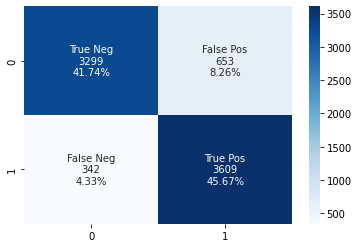

In [100]:
model_evaluation(classifier_lgbm, X_test, y_test)


In [101]:
# score con regularizaciones:
classifier_lgbm.fit(X_train, y_train)
y_pred_2 = classifier_lgbm.predict(X_test)
accuracy_score(y_test, y_pred_2)


0.8740984436290017

***5] Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier :***

In [102]:
stack = StackingClassifier(estimators=[('classifier_xgb_1', classifier_xgb_1),
                                       ('classifier_lgbm', classifier_lgbm),
                                       ('best_RF', best_RF),
                                       ('classifier_dt_1', classifier_dt_1)],
                           final_estimator=classifier_lgbm)


In [103]:
# Para implementar Stacking, se aplican los 4 clasificadores anteriores en conjunto:
# 1)XGBClassifier
# 2)LightGBMClassifier
# 3)RandomForestClassifier
# 4)DecisionTreeClassifier


In [104]:
# Tiene un hiperparámetro importante conocido como final_estimator. Es el clasificador el que hace la predicción final utilizando las clases pronosticadas
# por los diversos clasificadores y predice el resultado final.


[12:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

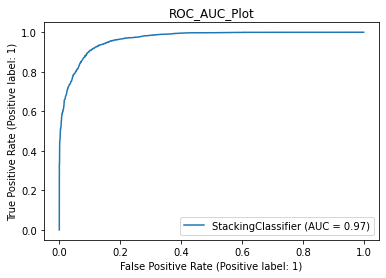

In [105]:
model(stack, X_train, y_train, X_test, y_test)


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3952
           1       0.85      0.91      0.88      3951

    accuracy                           0.87      7903
   macro avg       0.88      0.87      0.87      7903
weighted avg       0.88      0.87      0.87      7903



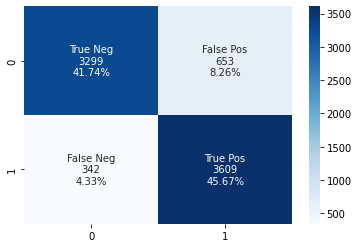

In [106]:
model_evaluation(classifier_lgbm, X_test, y_test)


In [107]:
# score con regularizaciones:

stack.fit(X_train, y_train)
y_pred_3 = stack.predict(X_test)
accuracy_score(y_test, y_pred_3)


[12:57:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.9048462609135771

In [134]:
# Como carga tu conjunto de datos original en una variable, por ejemplo, llamada data y observar los resultados del modelo.
data = df2.drop(['Churn'], axis=1)


In [135]:
# Carga las etiquetas o características que deseas predecir en una variable separada, por ejemplo, llamada labels.
# Usa el modelo entrenado para hacer predicciones en el conjunto de datos original. Esto se puede hacer, por ejemplo, usando el método predict del modelo.
predicted_labels = stack.predict(data)


In [136]:
# Agrega las predicciones al conjunto de datos original. Esto se puede hacer fácilmente usando la biblioteca pandas. Por ejemplo:

df3 = pd.DataFrame(data)
df3['predicted_labels'] = predicted_labels


In [137]:
# ver en el dataset df3 la columna predicted_labels
df3.head(5)

,País de Venta,Vertical,Cant de equipos arrendados,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,predicted_labels
0,11,26,1,0,0,0.00,3,0,0,0.00,0.00,0
1,1,5,1,4,0,0.00,3,38,15,53.26,0.70,0
2,2,5,2,14,0,0.00,0,22,0,58.32,0.50,0
3,10,29,0,21,0,0.00,3,0,0,0.00,0.00,1
4,4,13,3,1,0,1.00,2,3,4,54.86,0.29,0


In [138]:
# agregar al dataset df3 la columna customer id: 
df3['Customer_id'] = df['msdynci_customerid']


In [139]:
# ver incluida la columna customer id: 
df3.head(5)

,País de Venta,Vertical,Cant de equipos arrendados,Cant_de_comunic_últimos_24_meses,Encuestas,Ren_aut_de_contrato,Categoría_de_facturación,Cantidad_de_Incidentes,Cantidad_de_Reclamos,Tiempo promedio de respuesta,Tiempo_de_respuesta,predicted_labels,Customer_id
0,11,26,1,0,0,0.00,3,0,0,0.00,0.00,0,0d14eaf6e21c1292026c7b40ceae396e
1,1,5,1,4,0,0.00,3,38,15,53.26,0.70,0,2fb88bef68c15bdabd29702c7f7dbf5f
2,2,5,2,14,0,0.00,0,22,0,58.32,0.50,0,000ef4f31d53a8315a51f7f5c2d1b6a2
3,10,29,0,21,0,0.00,3,0,0,0.00,0.00,1,c26a37091399b830ec01f7fe3f5fa484
4,4,13,3,1,0,1.00,2,3,4,54.86,0.29,0,00109cbd2395b622807dc4835badcd96


In [140]:
# Guarda el conjunto de datos con las predicciones en un archivo CSV. Una forma de hacer esto es usando el método to_csv de pandas.
df3.to_csv('predict_best.csv', index=False)


**Guardar y cargar el modelo:**

In [ ]:
# Guardar modelo arbol 
modelo_dt = classifier_dt_1
with open('modelo_dt.pickle', 'wb') as archivo:
    pickle.dump(modelo_dt, archivo)


In [ ]:
# Cargar modelo arbol 
with open('modelo_dt.pickle', 'rb') as archivo:
    modelo_dt = pickle.load(archivo)


In [ ]:
print(modelo_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=20, random_state=1000)


In [ ]:
modelo_dt.predict(X_test)


array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
import os

In [ ]:
# Obtener el directorio de trabajo actual
directorio_actual = os.getcwd()


In [ ]:
# Imprimir la ubicación del archivo pickle
print(
    f"El archivo pickle se encuentra en: {directorio_actual}/mi_archivo.pickle")


El archivo pickle se encuentra en: c:\Users\Administrador\Desktop\respaldo disco\BIGDATA\Postgrado ORT\TESIS FINAL\Python_tesis\Proyecto/mi_archivo.pickle


In [ ]:
# Guardar modelo RF:
modelo_RF = best_RF
with open('modelo_RF.pickle', 'wb') as archivo:
    pickle.dump(modelo_RF, archivo)


In [ ]:
# Cargar modelo RF 
with open('modelo_RF.pickle', 'rb') as archivo:
    modelo_RF = pickle.load(archivo)


In [ ]:
modelo_RF.predict(X_test)


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
# Guardar modelo lgbm
modelo_lgbm = classifier_lgbm
with open('modelo_lgbm.pickle', 'wb') as archivo:
    pickle.dump(modelo_lgbm, archivo)


In [ ]:
# Cargar modelo lgbm
with open('modelo_lgbm.pickle', 'rb') as archivo:
    modelo_lgbm = pickle.load(archivo)


In [ ]:
modelo_lgbm.predict(X_test)


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
# Guardar modelo xgb
modelo_xgb = classifier_xgb_1
with open('modelo_xgb.pickle', 'wb') as archivo:
    pickle.dump(modelo_xgb, archivo)


In [ ]:
# Cargar modelo xgb
with open('modelo_xgb.pickle', 'rb') as archivo:
    modelo_xgb = pickle.load(archivo)


In [ ]:
modelo_xgb.predict(X_test)


array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [ ]:
# Guardar modelo stack
modelo_stk = stack
with open('modelo_stk.pickle', 'wb') as archivo:
    pickle.dump(modelo_stk, archivo)


In [ ]:
# Cargar modelo stack
with open('modelo_stk.pickle', 'rb') as archivo:
    modelo_stk = pickle.load(archivo)


In [ ]:
modelo_stk.predict(X_test)


array([1, 1, 0, ..., 1, 0, 1], dtype=int64)